<a href="https://colab.research.google.com/github/Xin-song/CS-5783-65257-Ziyang-Zhang/blob/main/HW1_Report_Ziyang_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

Task1: plot the relationship using matplotlib.(√)

Task2: Visualize the test data to see the underlying relationship between the variables.

Task3: Is the relationship linear?

Task4: Do you need feature engineering to add any non-linearity?

    If yes, how can you engineer these features
    What functions you can try? Plot each of them individually to verify.
    
Task5: write a short report detailing your thought process, the code you wrote in Python to implement the linear regression model and the equation that models the relationship between x and y.

Task6: Provide evidence that corroborates your final statement such as plots, prediction errors.

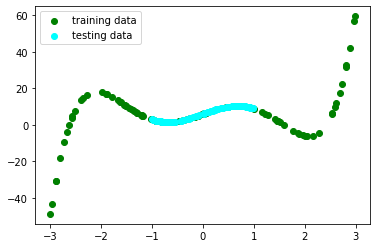

In [5]:
# Plot the training data and testing data
import numpy as np
import matplotlib.pyplot as plt

x_train = np.load("/content/data/x_train.npy")
x_test = np.load("/content/data/x_test.npy")
y_train = np.load("/content/data/y_train.npy")
y_test = np.load("/content/data/y_test.npy")

# Task1 Plotting the relationship between x and y.
plt.scatter(x_train, y_train, c="green", label = "training data") # green points are from training set
plt.scatter(x_test, y_test, c = "cyan", label = "testing data") # cyan points are from testing set
plt.legend()
plt.show()


For [1.], the relationship between x and y could be quintic polynomial. 

So, I assume the $y = \theta_0 + \theta_1x+ \theta_2x^2 + \theta_3x^3+ \theta_4x^4+ \theta_5x^5$


For [2.a.], The relationship between x and y is not linear.

For [2.b.], I will use polynomials to fit the relationship between x and y. 

For [2.b.i], I would try polynomial basis functions for 1~7the order. (7th order is in case of 5th doesn't work well).




## Define functions

In [102]:
# return the h_theta
def basis_func(x,dim):
    x_temp = x
    const_theta = np.ones((x.shape[0],1))
    for i in range(dim-1):
        x_ith_dim = np.power(x_temp,(i+2))
        x = np.concatenate((x, x_ith_dim),axis = 1)
    x = np.concatenate((x,const_theta),axis = 1)
    return x

def assumed_func(x,theta):

    obj = np.dot(x,theta.T)
    return obj

def cost_func(x,y,theta):
    J = 0.5*np.sum(np.power(assumed_func(x,theta)-y,2))
    return J
    
def grad_dec(LR,theta,x,y):
    diff = np.sum((x*(y-assumed_func(x,theta)).reshape(np.shape(x)[0],1)),axis = 0)
    theta = theta + LR*diff
    return theta

## Setups

### This part is for linear regression

In [28]:
# 1st order polynomial

dim = 1
x_hyp = basis_func(x_train,dim)
theta = np.array([0.5,0.5])
iterations = 10000
LR = 0.0001
cost = []
for i in range(iterations):
    J = cost_func(x_hyp, y_train, theta)
    cost.append(J)
    theta = grad_dec(LR,theta,x_hyp,y_train)
    

## Plotting the predictions of training data

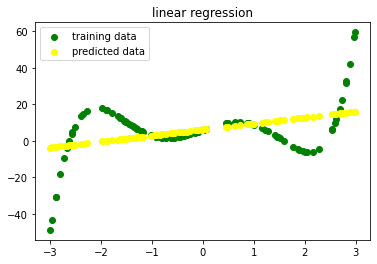

In [30]:
y_pred = assumed_func(x_hyp,theta)
plt.scatter(x_train,y_train,label = 'training data',c="green")
plt.scatter(x_train,y_pred,label = 'predicted data',c = "yellow")
plt.legend()
plt.title('linear regression')
plt.show()


## Regression with 2nd polynomial and other order polynomial basis functions

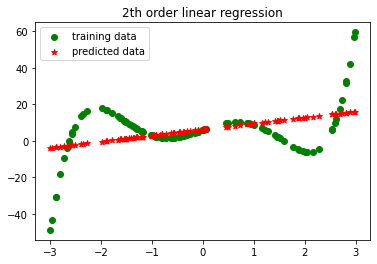

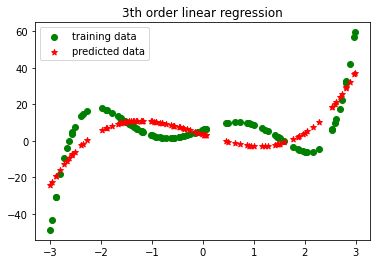

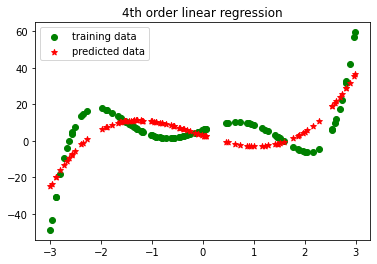

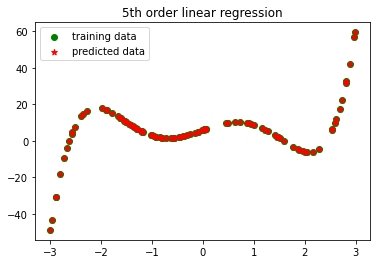

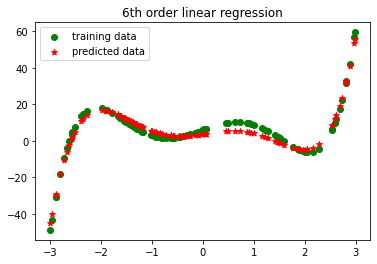

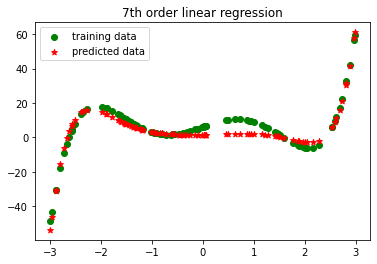

array([ 0.25912936,  0.95655102, -0.33014699,  0.16314439, -0.60541887,
       -0.02612105,  0.09886009,  1.39981314])

In [76]:

def n_th_polynomial(x,y,n,LR):
    x_hyp = basis_func(x_train,n)
    theta_temp = []
    for i in range(n+1):
      theta_temp.append(0.5)
    theta = np.array(theta_temp)
    iterations = 500000
    cost = []
    for i in range(iterations):
        J = cost_func(x_hyp, y_train, theta)
        cost.append(J)
        theta = grad_dec(LR,theta,x_hyp,y_train)
    y_pred = assumed_func(x_hyp,theta)
    plt.scatter(x_train,y_train,label = 'training data',c="green",marker = 'o')
    plt.scatter(x_train,y_pred,label = 'predicted data',c = "red",marker = '*')
    plt.legend()
    string = str(n) + 'th order linear regression'
    plt.title(string)
    plt.show()
    return theta

# try 2nd, 3rd to 7th order polynomial
n_th_polynomial(x_train,y_train,2,0.0001)
n_th_polynomial(x_train,y_train,3,0.0001)
n_th_polynomial(x_train,y_train,4,0.00001)
n_th_polynomial(x_train,y_train,5,0.000001)
n_th_polynomial(x_train,y_train,6,0.0000001)
n_th_polynomial(x_train,y_train,7,0.00000001)



## Conclusions

From teh above figures, we can see the 5th polynomial can fit the training samples well. So we can choose 5th polynomial basis functions to fit the training and testing samples.

## Validation on testing set

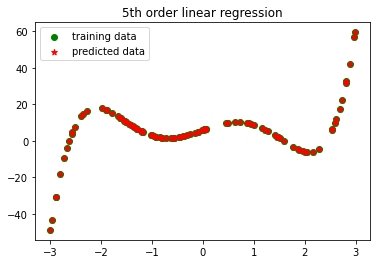

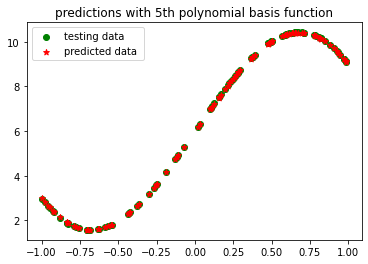

In [80]:
theta_5 = n_th_polynomial(x_train,y_train,5,0.000001)
x_test_new = basis_func(x_test,5)
y_test_pred = assumed_func(x_test_new,theta_5)
plt.scatter(x_test,y_test,label='testing data',c="green",marker = 'o')
plt.scatter(x_test,y_test_pred, label='predicted data ',c = "red",marker = '*')
plt.legend()
plt.title('predictions with 5th polynomial basis function')
plt.show()




From the figure, we can see the predicted values are very close to the actual data. So, the model with 5th polynomial basis functions have good performance.


# Question 2

## Question 2.1

Use 18 samples for training and 8 samples for testing.

In [110]:
data = np.genfromtxt('/content/data/Assignment1_Q2_Data.csv',skip_header=1,delimiter=',')
sample_num = 18
x_train = data[:sample_num,1:-1]
x_test = data[sample_num:,1:-1]
y_train = data[:sample_num,-1]
y_test = data[sample_num:,-1]
x_train_new = basis_func(x_train,1)

theta = np.ones(x_train_new.shape[1])

iterations = 50000
LR = 0.000001
cost = []
for i in range(iterations):
  J = cost_func(x_train_new,y_train, theta)
  cost.append(J)
  theta = grad_dec(LR, theta, x_train_new, y_train)

avg_LS_train = cost[-1]/sample_num
print('The average least square error for the training data is {0:.4f}'.format(avg_LS_train))

The average least square error for the training data is 5.8327


In [111]:
x_test_new = basis_func(x_test,1)
error = cost_func(x_test_new, y_test, theta)
avg_LS_test = error/(28-sample_num)
print('The average least square error for the training data is {0:.4f}'.format(avg_LS_test))

The average least square error for the training data is 28.6678


### The visualization of the results.

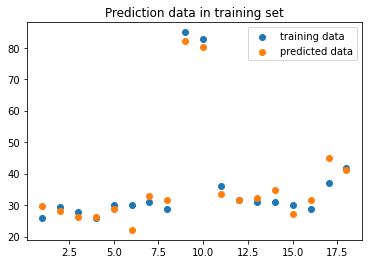

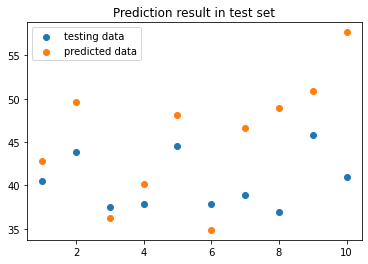

In [112]:
y_train_pred = assumed_func(x_train_new,theta)
plt.scatter(np.linspace(1,x_train_new.shape[0],x_train_new.shape[0]),y_train,label='training data')
plt.scatter(np.linspace(1,x_train_new.shape[0],x_train_new.shape[0]),y_train_pred,label='predicted data')
plt.legend()
plt.title('Prediction data in training set')
plt.show()

y_test_pred = assumed_func(x_test_new,theta)
plt.scatter(np.linspace(1,x_test_new.shape[0],x_test_new.shape[0]),y_test,label='testing data')
plt.scatter(np.linspace(1,x_test_new.shape[0],x_test_new.shape[0]),y_test_pred,label='predicted data')
plt.legend()
plt.title('Prediction result in test set')
plt.show()

### Conclusion

The average least squares error for the training data is 5.8327.

The average least squares error for the testing data is 28.6678.

## Question 2.2

the weight can represent the importance of the features.

In [113]:
print(theta)

[ 3.35562525  1.41330308  0.31030646  1.51703305  1.3004974   0.91992823
  0.98353146 -0.14151365  0.6333341   0.78025018  1.53865389  0.85566166]


From the theta, we can see the absolute value of weight for the first feature is highest. So, the local price should have the most effect on the final value.

In [118]:
data = np.genfromtxt('/content/data/Assignment1_Q2_Data.csv',skip_header=1,delimiter=',')
sample_num = 18
# get the 2nd column
x_train = data[:sample_num,1]
x_test = data[sample_num:,1]
y_train = data[:sample_num,-1]
y_test = data[sample_num:,-1]
x_train = x_train.reshape(x_train.shape[0],1)
x_test = x_test.reshape(x_test.shape[0],1)

x_train_new = basis_func(x_train,1)


theta = np.ones(x_train_new.shape[1])

iterations = 50000
LR = 0.000001
cost = []
for i in range(iterations):
  J = cost_func(x_train_new,y_train, theta)
  cost.append(J)
  theta = grad_dec(LR, theta, x_train_new, y_train)

avg_LS_train = cost[-1]/sample_num
print('The average least square error for the training data is {0:.4f}'.format(avg_LS_train))

x_test_new = basis_func(x_test,1)
error = cost_func(x_test_new, y_test, theta)
avg_LS_test = error/(28-sample_num)
print('The average least square error for the training data is {0:.4f}'.format(avg_LS_test))

The average least square error for the training data is 6.9705
The average least square error for the training data is 39.1448


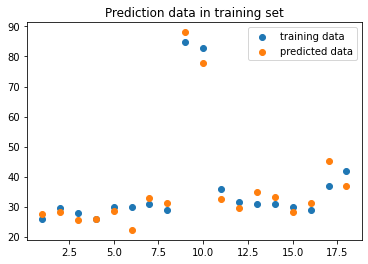

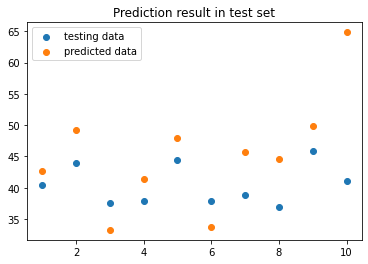

In [119]:
y_train_pred = assumed_func(x_train_new,theta)
plt.scatter(np.linspace(1,x_train_new.shape[0],x_train_new.shape[0]),y_train,label='training data')
plt.scatter(np.linspace(1,x_train_new.shape[0],x_train_new.shape[0]),y_train_pred,label='predicted data')
plt.legend()
plt.title('Prediction data in training set')
plt.show()

y_test_pred = assumed_func(x_test_new,theta)
plt.scatter(np.linspace(1,x_test_new.shape[0],x_test_new.shape[0]),y_test,label='testing data')
plt.scatter(np.linspace(1,x_test_new.shape[0],x_test_new.shape[0]),y_test_pred,label='predicted data')
plt.legend()
plt.title('Prediction result in test set')
plt.show()



### Conclusion

We can tell the important feature from the theta. From the theta, we can notice the weight for the Local Price is highest, which means the Local Price have the most impact on the final price. 

If we use only the Local Price feature, the average least squares error for the training and testing are 6.9705, 39.1448, respectively. 

I think we can use only this feature to predict the price, because according to the least square error, the difference between using only one feature and using all the features are not that different (28.6678 to 39.1448). But if we want the prediction more precise, we can and should use more features.

## Question 2.3

From the theta, we can see the absolute value of weight for the 8th feature, which is Age of Home is the lowest. 

(18, 10)
The average least square error for the training data is 5.4601
The average least square error for the training data is 27.4782


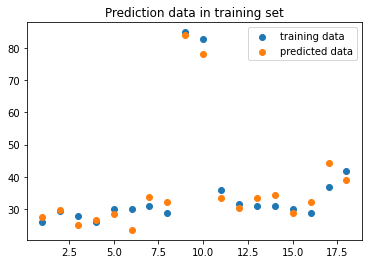

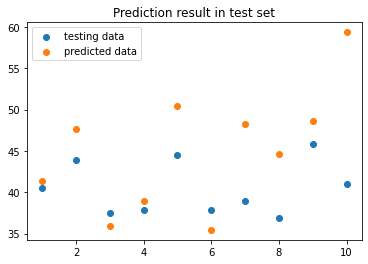

In [124]:
data = np.genfromtxt('/content/data/Assignment1_Q2_Data.csv',skip_header=1,delimiter=',')
sample_num = 18
# get the 2nd column
x_train = data[:sample_num,1:-1]
x_train = np.delete(x_train,-4,1)
x_test = data[sample_num:, 1:-1]
x_test = np.delete(x_test,-4,1)
y_train = data[:sample_num,-1]
y_test = data[sample_num:,-1]
print(x_train.shape)

x_train_new = basis_func(x_train,1)


theta = np.ones(x_train_new.shape[1])

iterations = 50000
LR = 0.000001
cost = []
for i in range(iterations):
  J = cost_func(x_train_new,y_train, theta)
  cost.append(J)
  theta = grad_dec(LR, theta, x_train_new, y_train)

avg_LS_train = cost[-1]/sample_num
print('The average least square error for the training data is {0:.4f}'.format(avg_LS_train))

x_test_new = basis_func(x_test,1)
error = cost_func(x_test_new, y_test, theta)
avg_LS_test = error/(28-sample_num)
print('The average least square error for the training data is {0:.4f}'.format(avg_LS_test))

y_train_pred = assumed_func(x_train_new,theta)
plt.scatter(np.linspace(1,x_train_new.shape[0],x_train_new.shape[0]),y_train,label='training data')
plt.scatter(np.linspace(1,x_train_new.shape[0],x_train_new.shape[0]),y_train_pred,label='predicted data')
plt.legend()
plt.title('Prediction data in training set')
plt.show()

y_test_pred = assumed_func(x_test_new,theta)
plt.scatter(np.linspace(1,x_test_new.shape[0],x_test_new.shape[0]),y_test,label='testing data')
plt.scatter(np.linspace(1,x_test_new.shape[0],x_test_new.shape[0]),y_test_pred,label='predicted data')
plt.legend()
plt.title('Prediction result in test set')
plt.show()

### Conclusion

The Age of House have the least effect on the final value (according to the weight in theta). Removing this feature can improve the average least square error. 

For the training data, the average least square error would drop to 5.4601, and the average least square error on the testing set would drop to 27.4782.

# Question 3


## Functions setups

In [145]:
x_train = np.load("/content/data/x_train.npy")
x_test = np.load("/content/data/x_test.npy")
y_train = np.load("/content/data/y_train.npy")
y_test = np.load("/content/data/y_test.npy")

# Local weight matrix
def w_matrix(x0, X, tau):
    m = X.shape[0]
    w = np.mat(np.eye(m))
    for i in range(m):
      xi = X[i]
      d = (-2*tau**2)
      w[i,i] = np.exp(np.dot((xi-x0),(xi-x0).T)/d)
    return w

def predct_LW(X,Y,x0,tau):
  m = X.shape[0]
  Y = np.array(Y).reshape(Y.shape[0],1)
  
  # Adding bias
  X_new = np.append(X, np.ones(m).reshape(m,1),axis =1)
  x0_new = np.array([x0,1])

  w = w_matrix(x0_new, X_new, tau)
  theta = np.linalg.pinv(X_new.T*(w*X_new))*(X_new.T*(w*Y))

  pred = np.dot(x0_new,theta)
  return theta, pred

# Using Normal Equations to predict
def predict_Normal_eq(X,Y,x_test,tau):
  preds_train = []
  preds_test = []  
  for point in X:
    theta, pred = predct_LW(X,Y, point, tau)
    preds_train.append(pred)
  for point in x_test:
    theta, pred = predct_LW(X,Y, point, tau)
    preds_test.append(pred)
  return preds_train, preds_test



## Implementation of locally weighted model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


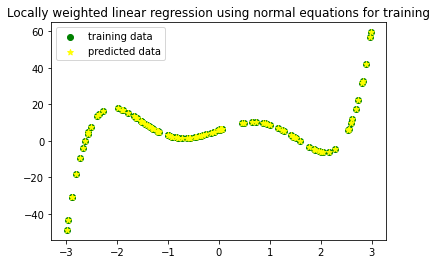

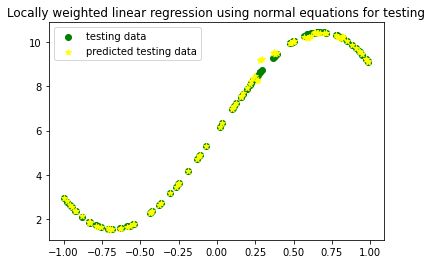

In [148]:
y_train_pred, y_test_pred = predict_Normal_eq(x_train, y_train, x_test, 0.01)

plt.scatter(x_train,y_train,c="green",marker = 'o',label='training data')
plt.scatter(x_train,y_train_pred,c = "yellow",marker = '*',label='predicted data')
plt.legend()
plt.title('Locally weighted linear regression using normal equations for training')
plt.show()

plt.scatter(x_test,y_test,c="green",marker = 'o',label='testing data')
plt.scatter(x_test,y_test_pred,c = "yellow",marker = '*',label='predicted testing data')
plt.legend()
plt.title('Locally weighted linear regression using normal equations for testing')
plt.show()

## Conclusions

### Question 3.1

No, we don't need basis functions when using locally weighted approach.

### Question 3.2
Since I used gradient decent for Question 1, and normal equations for Question 3, I think the there are following differences:

1. The most important difference is the weight matrix W.

2. The matrix W will improve the computational complexity.

3. But with the locally weighted matrix W, the model will have better performance when the data is not linear.

4. With locally weighted model, you don't have to make good assumption about the basis fucntions to get good prediction results. 